In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime, date, timedelta
#machine learning libraries
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
%matplotlib inline  
#ensemble learning 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV   #Perforing grid search
#in house python 2 env
import Ensemble_library as ES
from sklearn.metrics import roc_curve, auc

In [256]:
holding_period = 60 # 1 hr holding period

In [257]:
groupped_sentiment_15min_df = pd.read_csv("groupped_sentiment_15min_df.csv",header=0)
stock_df = pd.read_csv("stock_df.csv", header=0)

In [258]:
stock_df.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
0,39.982917,15.822593,48.747035,149.843333,127.446272,58.811938,100.025000,46.106976,89.680000,76.669665,...,41.486132,92.731759,52.603630,13.740000,35.963150,44.389807,74.660000,NaN,26.248104,45.566895
1,40.005965,15.818974,48.682342,149.843333,127.688120,58.803611,100.087857,46.141114,89.477516,76.787148,...,41.486132,92.689992,52.655000,13.721538,35.959000,44.404404,74.706031,NaN,26.302311,45.566895
2,40.102214,15.789142,48.891180,149.843333,127.738667,58.930407,100.182045,46.108061,89.477516,76.808792,...,41.373725,92.700227,52.615130,13.719722,35.943333,44.337100,74.594534,NaN,26.360256,45.713000
3,40.099149,15.802009,48.880000,149.813654,127.702581,58.713699,100.182045,46.063788,89.445679,76.747101,...,41.436667,92.892596,52.615130,13.709741,35.922667,44.300666,74.594534,NaN,26.361715,45.705882
4,40.095567,15.799455,48.888987,149.956667,127.669204,58.659026,100.188564,46.021429,89.538493,76.775631,...,41.378261,92.812826,52.543902,13.722692,35.922667,44.248294,74.564296,NaN,26.306498,45.694539


In [259]:
def merge_sentiment_return(groupped_sentiment_15min_df, stock_df, holding_period=60):
    # we extract all the ticker names
    tickers = stock_df.columns.values
    tickers = np.delete(tickers, np.where(tickers == "Time")) # delete the time columns

    # get a new copy of the data
    stock_return_df = stock_df.copy()
    
    # get percent change
    stock_return_df[tickers] = stock_return_df[tickers].pct_change(holding_period/15)
    
    stock_return_double_key = pd.melt(stock_return_df, id_vars="Time",var_name="Ticker", 
                                      value_name="Return_h_"+str(holding_period))
    sentiment_return_merged_df = pd.merge(groupped_sentiment_15min_df, stock_return_double_key, 
                              on=["Time", "Ticker"], how="left").dropna(axis=0)
    
    return sentiment_return_merged_df.reset_index(drop=True)

In [260]:
# call the function
sentiment_return_merged_df = merge_sentiment_return(groupped_sentiment_15min_df, stock_df, holding_period)

# group by ticker
sentiment_return_merged_groupby = sentiment_return_merged_df.groupby("Ticker")

In [261]:
#creating lags
def make_lag(df):
    lag = []
    for i in range(1,5): 
        lag.append("lag_"+str(i*4))
        df[lag[i-1]] = df["Return_h_60"].shift(i*4)
    df=df.dropna()
    return df

#create delta
def make_delta(df):
    diff=[]
    for i in range(1,5):
        diff.append("delta"+str(i*4))
        df[diff[i-1]] = df["Return_h_60"].diff(i*4)
    df=df.dropna()
    return df

In [262]:
ticker_df_list = []
for ticker, group in sentiment_return_merged_groupby:
    ticker_df_list.append(make_lag(make_delta(group)))

final_df = pd.concat(ticker_df_list)
    

/Users/YIHUILI/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/YIHUILI/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A done.
AA done.
AAL done.
AAP done.
AAPL done.
ABBV done.
ABC done.
ABT done.
ACN done.
ADBE done.
ADI done.
ADM done.
ADP done.
ADS done.
ADSK done.
AEE done.
AEP done.
AES done.
AET done.
AFL done.
AGN done.
AIG done.
AIV done.
AIZ done.
AJG done.
AKAM done.
ALB done.
ALK done.
ALL done.
ALLE done.
ALXN done.
AMAT done.
AME done.
AMG done.
AMGN done.
AMP done.
AMT done.
AMZN done.
AN done.
ANTM done.
AON done.
APA done.
APC done.
APD done.
APH done.
ATVI done.
AVB done.
AVGO done.
AVY done.
AWK done.
AXP done.
AYI done.
AZO done.
BA done.
BAC done.
BAX done.
BBBY done.
BBT done.
BBY done.
BDX done.
BEN done.
BHI done.
BIIB done.
BK done.
BLK done.
BLL done.
BMY done.
BSX done.
BWA done.
BXP done.
C done.
CA done.
CAG done.
CAH done.
CAT done.
CB done.
CBG done.
CBS done.
CCI done.
CCL done.
CELG done.
CERN done.
CF done.
CFG done.
CHD done.
CHK done.
CHRW done.
CI done.
CINF done.
CL done.
CLX done.
CMA done.
CMCSA done.
CME done.
CMG done.
CMI done.
CMS done.
CNC done.
COF done.
CO

In [307]:
#define variables
col=['sentiment_mean','sentiment_std', 'sentiment_count','event_pview_count','event_click_count', 'event_search_count',\
    'event_share_count','lag_4','lag_8',"lag_12","lag_16",'delta4','delta8','delta12','delta16','Return_h_60']

y="Return_h_60"
predictors= ['sentiment_mean','sentiment_std', 'sentiment_count','event_pview_count', 
             'event_click_count', 'event_search_count','event_share_count']
predictors_bm =['lag_4',"lag_8","lag_12",'lag_16','delta4','delta8','delta12','delta16']

In [308]:
label = 'return_sign'

final_df['return_sign'] = final_df['Return_h_60']>0



In [309]:
final_df = final_df.sort_values("Time").reset_index(drop=True)

# try non-linear methods

In [310]:

#split data
m=final_df.shape[0]
test_portion=0.8

test_data = final_df.iloc[int(m*test_portion):]
train_valid_data = final_df.iloc[:int(m*test_portion)]


## check if we slice correctly
assert len(test_data)+ len(train_valid_data) == m 

In [311]:
(final_df['return_sign'] == True).sum()/1./final_df.shape[0]

0.46013935315724147

In [312]:
train_valid_data["Time"].max()

'2015-09-30 17:15:00'

In [313]:
test_data["Time"].min()

'2015-09-30 17:15:00'


Model Report
Accuracy : 0.9195
AUC Score (Train): 0.977973
CV Score : Mean - 0.496766 | Std - 0.006626773 | Min - 0.4860499 | Max - 0.5034367


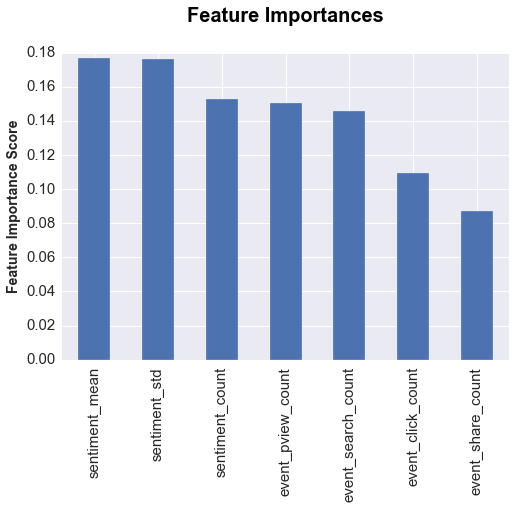

In [314]:
#bagging with all benchmark features, Excess change ROE
rf_benchmark1 = RandomForestClassifier()
ES.modelfit(rf_benchmark1, train_valid_data, predictors, label)
y1_pred_benchmark=rf_benchmark1.predict(test_data[predictors])

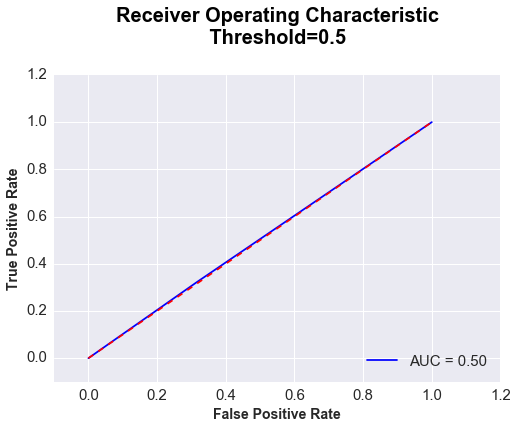

(0.50323225989924036, 1.0)

In [315]:
#look at OOS AUC
ES = reload (ES)
ES.getAUC(rf_benchmark1,test_data,predictors,label,threshold=0.5, show_plot=True)

In [297]:
rf_benchmark1.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Model Report
Accuracy : 0.9998
AUC Score (Train): 1.000000
CV Score : Mean - 0.9995504 | Std - 8.304835e-05 | Min - 0.9994168 | Max - 0.9996511


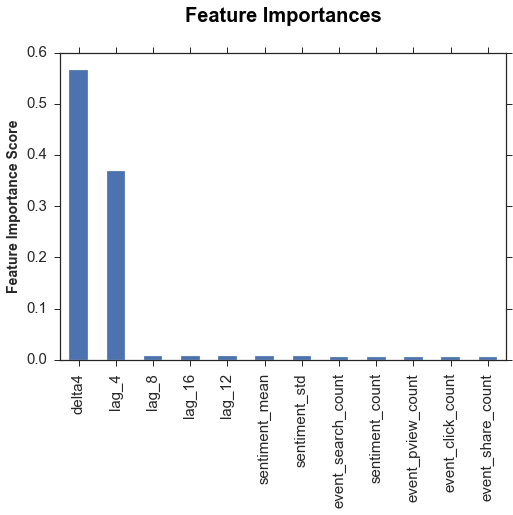

In [223]:
#bagging with all benchmark features, Excess change ROE
rf_glimpse = RandomForestClassifier()
ES.modelfit(rf_glimpse, train_valid_data, predictors, label)

[ 0.98782935  0.99109685  0.99109685  0.99109685  0.99109685  0.99109685
  0.99109685  0.99109685  0.99109685  0.99109685  0.99109685  0.99412419
  0.99412419  0.99412419  0.99412419  0.99412419  0.99412419  0.99412419
  0.99412419  0.99412419  0.99412419  0.99641728  0.99641728  0.99641728
  0.99641728  0.99641728  0.99641728  0.99641728  0.99641728  0.99641728
  0.99641728  0.99810021  0.99810021  0.99810021  0.99810021  0.99810021
  0.99810021  0.99810021  0.99810021  0.99810021  0.99810021  0.99929693
  0.99929693  0.99929693  0.99929693  0.99929693]


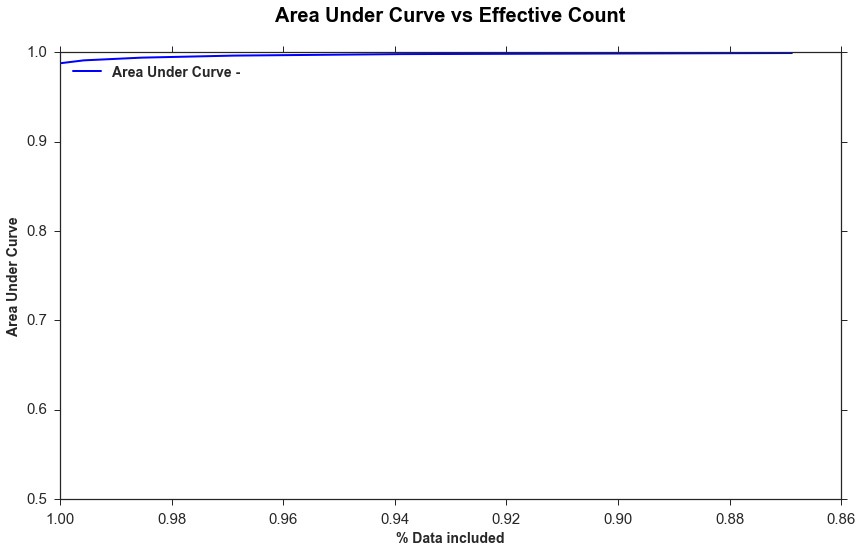

In [254]:
ES = reload(ES)
ES.AUCvsCountsPlot(rf_benchmark1, test_data, predictors_bm, label)


In [316]:
##2.train max_feature
n_estimators= 100
min_samples_split = 0.001*m ## make it 1% of the data
param_test2 = {'max_features':list(range(1,7,2))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier( n_estimators = n_estimators, 
    min_samples_leaf = 1,
    min_samples_split=min_samples_split, max_depth=20,random_state=10, n_jobs = -1,criterion="entropy"),
    param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=3)
gsearch2.fit(train_valid_data[predictors],train_valid_data[label])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.54455, std: 0.00004, params: {'max_features': 1},
  mean: 0.54441, std: 0.00010, params: {'max_features': 3},
  mean: 0.54434, std: 0.00018, params: {'max_features': 5}],
 {'max_features': 1},
 0.54455331971708409)

In [319]:
rf2=gsearch2.best_estimator_
rf2.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 1,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2179.355,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}